In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
import glob

In [ ]:
# Failo pavadinime yra specifinis kodas (D_5k, D_2k, B_1k, ir taip toliau). Pagal ansktesnį pavyzdį
# matyti, jog taip paprastai atrenkant - tas trumpinys pakinta
# pakeiskite skriptą taip, kad
# jei jūsų skriptas rado, kad pavyzdžiui, DAY0 geriausias REF yra su kodu D_5k, tai
# DAY1 ir DAY2 turi būti vaizduojami duomenys iš failų su tuo pat kodu (D_5k pavyzdžiui)

In [2]:
# dat_failai = glob.glob('../../DATA/OOP_DATA/*.dat')
ref_files = glob.glob('DATA1/DAY0/REF*.dat')
print(ref_files)

['DATA1/DAY0\\REF_D_1k_FW_2.08.dat', 'DATA1/DAY0\\REF_D_2k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_3k_FW_2.03.dat', 'DATA1/DAY0\\REF_D_4k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_5k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_5k_FW_2.07.dat']


In [5]:
df = pd.read_csv(ref_files[0], sep=';')
df.columns

Index(['U[V] ', ' I[A] ', ' j[mA/cm^2] ', ' P[mW/cm^2]'], dtype='object')

In [7]:
max_p = abs(df[' P[mW/cm^2]'].min())
print(max_p)

14.9890787


In [8]:
eff_list = []
for file in ref_files:
    df = pd.read_csv(file, sep=';')
    max_p = abs(df[' P[mW/cm^2]'].min())
    eff_list.append(max_p)
print(eff_list)

[np.float64(14.9890787), np.float64(7.5438748), np.float64(7.4238104), np.float64(8.0058633), np.float64(5.8455224), np.float64(7.5898202)]


In [10]:
idx = eff_list.index(max(eff_list))
print(idx)

0


In [11]:
df = pd.read_csv(ref_files[0], sep=';')
df.columns

Index(['U[V] ', ' I[A] ', ' j[mA/cm^2] ', ' P[mW/cm^2]'], dtype='object')

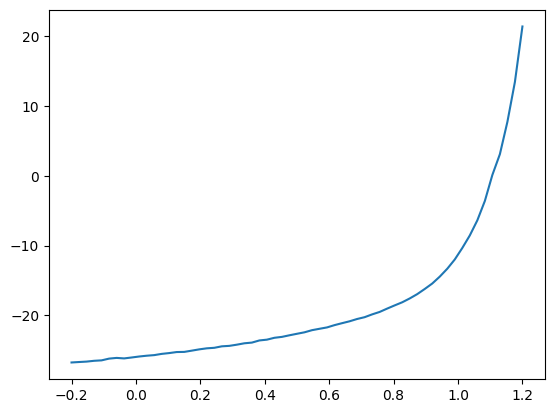

In [12]:
fig, axis = plt.subplots()
axis.plot(df['U[V] '], df[' j[mA/cm^2] '])
plt.show()

In [13]:
df['j'] = df[' j[mA/cm^2] '].apply(lambda x: x*(-1))

In [28]:
# df1 = df[(df['j'] >= 0)]
df1 = df[(df['j'] >= 0) & (df['U[V] '] >=0)]
df1.head()

,U[V],I[A],j[mA/cm^2],P[mW/cm^2],j
5,1.083333,-0.000216,-3.596502,-3.896210,3.596502
6,1.060000,-0.000382,-6.373672,-6.756092,6.373672
7,1.036667,-0.000512,-8.536653,-8.849664,8.536653
8,1.013333,-0.000620,-10.338713,-10.476563,10.338713
9,0.990000,-0.000719,-11.985222,-11.865369,11.985222


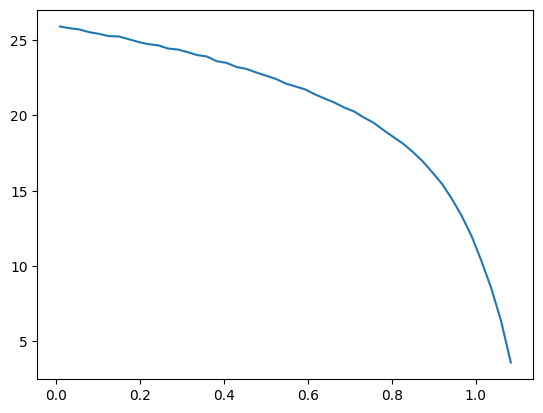

In [29]:
fig, axis = plt.subplots()
axis.plot(df1['U[V] '], df1['j'])
# axis.set_xlim(0, 1.2)
# axis.set_ylim(0, 30)
plt.show()

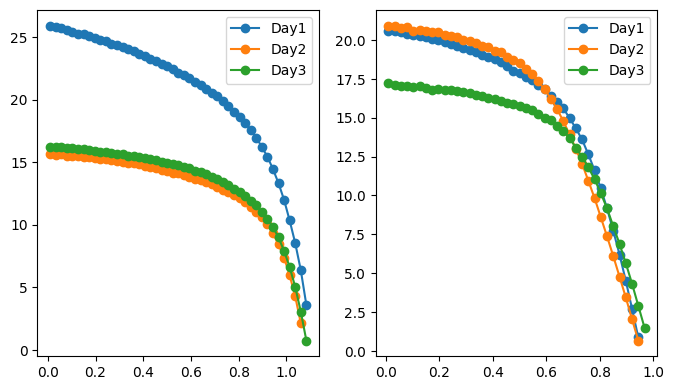

In [67]:
def get_files(kelias):
    files = glob.glob(kelias)
    return files

def get_max_p_file_index(kelias):
    eff_list = []
    files = get_files(kelias)
    for file in files:
        df = pd.read_csv(file, sep=';')
        max_p = abs(df[' P[mW/cm^2]'].min())
        eff_list.append(max_p)
    idx = eff_list.index(max(eff_list))
    return idx

def get_df(kelias):
    ref_files = get_files(kelias)
    idx = get_max_p_file_index(kelias)
    df = pd.read_csv(ref_files[idx], sep=';')
    df['j'] = df[' j[mA/cm^2] '].apply(lambda x: x*(-1))
    df1 = df[(df['j'] >= 0) & (df['U[V] '] >=0)]
    return df1
    

ref_rinkiniai = ['../../../DATA1/DAY0/REF*.dat', '../../../DATA1/DAY1/REF*.dat', '../../../DATA1/DAY2/REF*.dat']
V1145_rinkiniai = ['../../../DATA1/DAY0/V1145*.dat', '../../../DATA1/DAY1/V1145*.dat', '../../../DATA1/DAY2/V1145*.dat']

    

df0 = get_df(ref_rinkiniai[0])
df1 = get_df(ref_rinkiniai[1])
df2 = get_df(ref_rinkiniai[2])

df0v = get_df(V1145_rinkiniai[0])
df1v = get_df(V1145_rinkiniai[1])
df2v = get_df(V1145_rinkiniai[2])

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(8, 4.5))
axis1.plot(df0['U[V] '], df0['j'], marker='o', label='Day1')
axis1.plot(df1['U[V] '], df1['j'], marker='o', label='Day2')
axis1.plot(df2['U[V] '], df2['j'], marker='o', label='Day3')


axis2.plot(df0v['U[V] '], df0v['j'], marker='o', label='Day1')
axis2.plot(df1v['U[V] '], df1v['j'], marker='o', label='Day2')
axis2.plot(df2v['U[V] '], df2v['j'], marker='o', label='Day3')

axis1.legend()
axis2.legend()
# axis.set_xlim(0, 1.2)
# axis.set_ylim(0, 30)
plt.show()


In [53]:
failai = get_files(ref_rinkiniai[0])
print(failai)
idx = get_max_p_file_index(ref_rinkiniai[0])
print(idx)
print(failai[idx])

['DATA1/DAY0\\REF_D_1k_FW_2.08.dat', 'DATA1/DAY0\\REF_D_2k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_3k_FW_2.03.dat', 'DATA1/DAY0\\REF_D_4k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_5k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_5k_FW_2.07.dat']
0
DATA1/DAY0\REF_D_1k_FW_2.08.dat


In [60]:
def get_max_p_file_index(kelias):
    eff_list = []
    files = get_files(kelias)
    for file in files:
        df = pd.read_csv(file, sep=';')
        max_p = abs(df[' P[mW/cm^2]'].min())
        eff_list.append(max_p)
    idx = eff_list.index(max(eff_list))
    return idx, max_p

idx = get_max_p_file_index(ref_rinkiniai[0])
print(round(idx[1], 2))
p = f'{round(idx[1], 2)} %'
print(p)

7.59
7.59 %


In [ ]:
def get_files(kelias):
    files = glob.glob(kelias)
    return files

def get_max_p_file_index(kelias):
    eff_list = []
    files = get_files(kelias)
    for file in files:
        df = pd.read_csv(file, sep=';')
        max_p = abs(df[' P[mW/cm^2]'].min())
        eff_list.append(max_p)
    idx = eff_list.index(max(eff_list))
    p_max = max(eff_list)
    return idx, p_max

def get_df(kelias):
    ref_files = get_files(kelias)
    idx = get_max_p_file_index(kelias)
    df = pd.read_csv(ref_files[idx[0]], sep=';')
    df['j'] = df[' j[mA/cm^2] '].apply(lambda x: x*(-1))
    df1 = df[(df['j'] >= 0) & (df['U[V] '] >=0)]
    return df1
    

ref_rinkiniai = ['../../../DATA1/DAY0/REF*.dat', '../../../DATA1/DAY1/REF*.dat', '../../../DATA1/DAY2/REF*.dat']
V1145_rinkiniai = ['../../../DATA1/DAY0/V1145*.dat', '../../../DATA1/DAY1/V1145*.dat', '../../../DATA1/DAY2/V1145*.dat']

id_p0 = get_max_p_file_index[ref_rinkiniai[0]]
num = id_p0[0]
p = f'{round(id_p0[1], 2)} %'

ref_files0 = get_files(ref_rinkiniai[0])
ref_label1 = f'{ref_files0[num]}'    

df0 = get_df(ref_rinkiniai[0])
df1 = get_df(ref_rinkiniai[1])
df2 = get_df(ref_rinkiniai[2])

df0v = get_df(V1145_rinkiniai[0])
df1v = get_df(V1145_rinkiniai[1])
df2v = get_df(V1145_rinkiniai[2])

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(8, 4.5))
axis1.plot(df0['U[V] '], df0['j'], marker='o', label=ref_label1)
axis1.plot(df1['U[V] '], df1['j'], marker='o', label='Day2')
axis1.plot(df2['U[V] '], df2['j'], marker='o', label='Day3')


axis2.plot(df0v['U[V] '], df0v['j'], marker='o', label='Day1')
axis2.plot(df1v['U[V] '], df1v['j'], marker='o', label='Day2')
axis2.plot(df2v['U[V] '], df2v['j'], marker='o', label='Day3')

axis1.legend()
axis2.legend()
# axis.set_xlim(0, 1.2)
# axis.set_ylim(0, 30)
plt.show()

TypeError: 'function' object is not subscriptable

In [65]:
ref_files0 = get_files(ref_rinkiniai[0])
print(ref_files0)

['DATA1/DAY0\\REF_D_1k_FW_2.08.dat', 'DATA1/DAY0\\REF_D_2k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_3k_FW_2.03.dat', 'DATA1/DAY0\\REF_D_4k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_5k_FW_2.05.dat', 'DATA1/DAY0\\REF_D_5k_FW_2.07.dat']
